# <div style="text-align: center; color: cyan">Augmentation</div>

## <div style="text-align: center; color: lime">Setup</div>

In [1]:
import os

os.environ["KERAS_BACKEND"] = "torch"

## <div style="text-align: center; color: lime">Imports</div>

In [2]:
from keras.layers import (
    RandomFlip,
    RandomRotation,
    RandomZoom,
    RandomTranslation,
    RandomContrast,
    RandomBrightness,
    RandomCrop,
    Layer,
)

import torch
from torchvision.transforms import ToTensor, ToPILImage

from matplotlib import pyplot as plt

from PIL import Image
from pathlib import Path

from math import ceil

## <div style="text-align: center; color: lime">Helper function to run multiple times and show</div>

In [3]:
def run_and_show(image: torch.Tensor, layer: Layer, number_of_runs=6):
    results = []
    for i in range(number_of_runs):
        results.append(layer(image))

    num_rows = ceil(abs(number_of_runs ** (1 / 2)))
    num_cols = ceil(number_of_runs / num_rows)

    fig, axes = plt.subplots(num_rows, num_cols)
    axes_ravel = axes.ravel()
    for ax in axes_ravel:
        ax.axis('off')

    for i, result in enumerate(results):
        result = result.permute((2, 0, 1))
        axes_ravel[i].imshow(ToPILImage()(result))

    return results

## <div style="text-align: center; color: lime">Download an image</div>

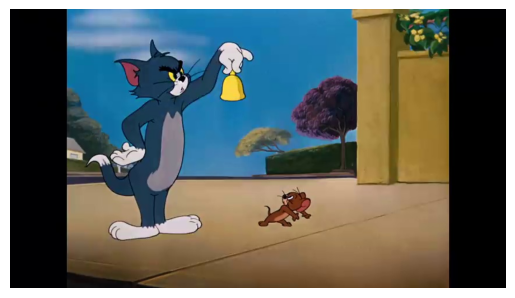

In [4]:
image_path = Path("../../docs/6-preprocessing-and-augmentation/tom-and-jerry-image-example.jpg")

if not image_path.exists():
    """
    https://raw.githubusercontent.com/LiterallyTheOne/deep-learning-with-keras/refs/heads/main/docs/6-preprocessing-and-augmentation/tom-and-jerry-image-example.jpg
    """
    pass

image_pil = Image.open(image_path)

plt.figure()
plt.axis("off")
plt.imshow(image_pil)

In [5]:
image = ToTensor()(image_pil)
image = image.permute((1, 2, 0))

print(image.shape)

torch.Size([480, 854, 3])


## <div style="text-align: center; color: lime">RandomFlip</div>

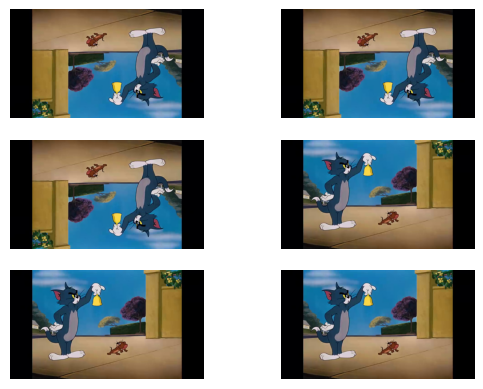

In [11]:
random_flip_layer = RandomFlip("horizontal_and_vertical")
results = run_and_show(image, random_flip_layer)

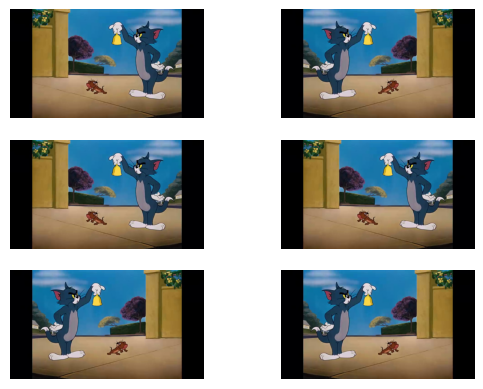

In [7]:
random_flip_layer = RandomFlip("horizontal")
results = run_and_show(image, random_flip_layer)

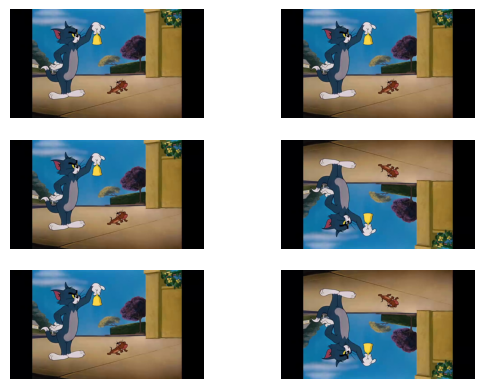

In [8]:
random_flip_layer = RandomFlip("vertical")
results = run_and_show(image, random_flip_layer)

## <div style="text-align: center; color: lime">RandomRotation</div>

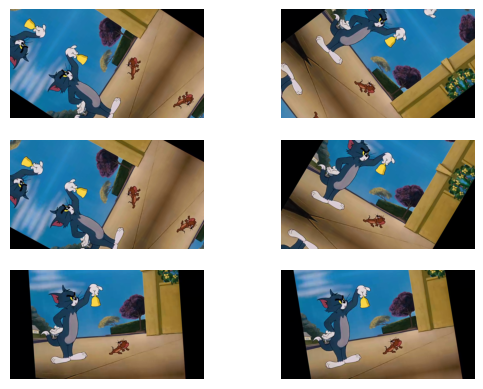

In [9]:
random_rotation_layer = RandomRotation(0.2)
results = run_and_show(image, random_rotation_layer)

## <div style="text-align: center; color: lime">RandomZoom</div>

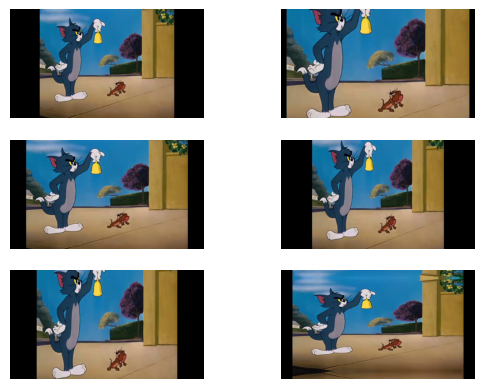

In [8]:
random_zoom_layer = RandomZoom(0.4, 0.2)
results = run_and_show(image, random_zoom_layer)

## <div style="text-align: center; color: lime">RandomTranslation</div>

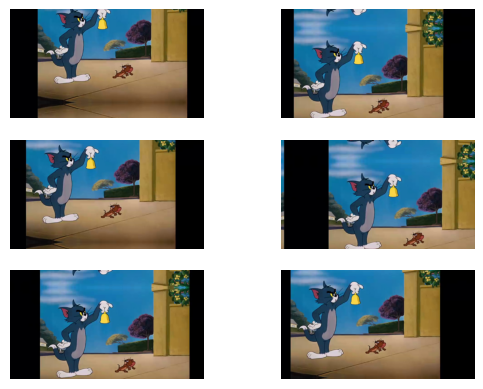

In [11]:
random_translation_layer = RandomTranslation(0.2, 0.2)
results = run_and_show(image, random_translation_layer)

## <div style="text-align: center; color: lime">RandomContrast</div>

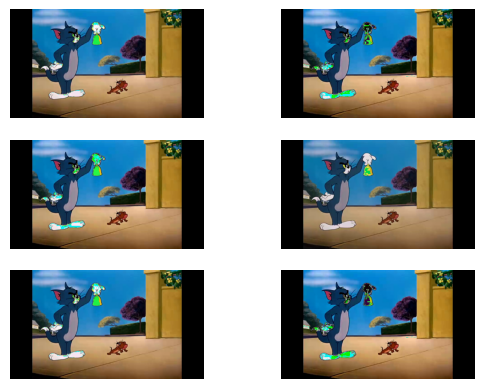

In [12]:
random_contrast_layer = RandomContrast(0.4)
results = run_and_show(image, random_contrast_layer)

## <div style="text-align: center; color: lime">RandomBrightness</div>

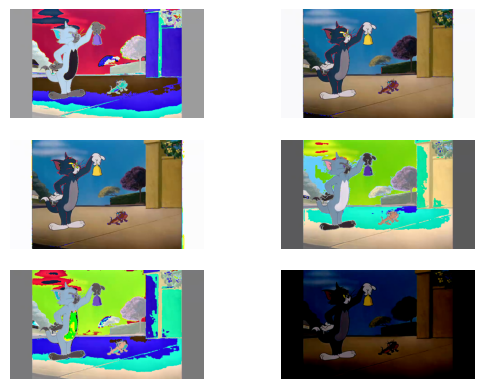

In [15]:
random_brightness_layer = RandomBrightness(0.1)
results = run_and_show(image, random_brightness_layer)

## <div style="text-align: center; color: lime">RandomCrop</div>

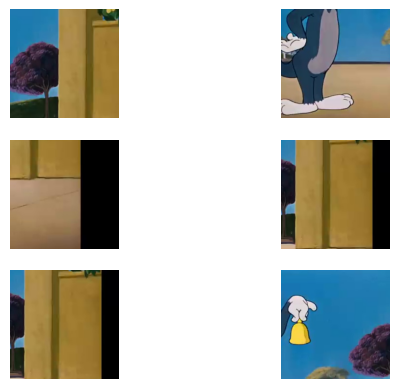

In [14]:
random_crop_layer = RandomCrop(224, 224)
results = run_and_show(image, random_crop_layer)

<p style="text-align: center; font-family: "Trebuchet MS", sans-serif; color: #888; font-size: 0.9em; margin-top: 2em; border-top: 1px solid #ccc; padding-top: 0.5em;">
    @LiterallyTheOne — PhD Candidate in Artificial Intelligence
</p>

<div style="text-align: center">
<a style="margin: 1em" href="https://literallytheone.github.io">https://literallytheone.github.io</a>
</div>
